In [1]:
import numpy as np
import pandas as pd
# import scanpy.api as sc
import scanpy as sc
import anndata as ann
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = (1,1,1,1)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [31]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis', transparent=False, frameon=False, fontsize=20)

sc.settings.figdir = './scanpy/GTEx'

In [2]:
df_gtex = pd.read_csv(
    '/home/yyasumizu/media32TB/bioinformatics/reference/gtex/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct.gz',
sep='\t', skiprows=2)
df_gtex.index = df_gtex['Description']
df_gtex.index.name = 'gene'
df_gtex = df_gtex.drop(columns=['Name', 'Description'])

df_gtex_annot = pd.read_csv(
    "/home/yyasumizu/media32TB/bioinformatics/reference/gtex/GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt", 
    sep='\t', index_col=0
)

df_gtex_annot = df_gtex_annot[['SMTS']]
df_gtex_annot = df_gtex_annot.loc[df_gtex.columns]

In [3]:
df_gtex

,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2526-SM-5GZY6,GTEX-1117F-2826-SM-5GZXL,GTEX-1117F-2926-SM-5GZYI,...,GTEX-ZZPU-1126-SM-5N9CW,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1426-SM-5GZZ6,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2426-SM-5E44I,GTEX-ZZPU-2626-SM-5E45Y,GTEX-ZZPU-2726-SM-5NQ8O
gene,,,,,,,,,,,,,,,,,,,,,
DDX11L1,0.00000,0.000,0.000,0.00000,0.000,0.0000,0.000,0.00000,0.000,0.00000,...,0.00000,0.03629,0.00000,0.000,0.00000,0.0000,0.000,0.00000,0.01965,0.02522
WASH7P,8.76400,3.861,7.349,11.07000,3.306,5.3890,11.990,16.95000,10.040,12.50000,...,1.60600,2.26800,5.38600,2.310,2.45600,4.0230,1.922,2.85700,0.86960,2.16700
MIR6859-1,0.00000,0.000,1.004,0.00000,0.000,0.0000,0.000,0.00000,0.000,0.00000,...,0.00000,0.00000,0.00000,0.000,0.00000,0.0000,0.000,0.00000,0.00000,0.00000
MIR1302-2HG,0.07187,0.000,0.000,0.06761,0.000,0.0000,0.000,0.00000,0.000,0.06265,...,0.00000,0.00000,0.06073,0.000,0.08464,0.1435,0.000,0.05216,0.00000,0.00000
FAM138A,0.00000,0.000,0.000,0.00000,0.000,0.0000,0.000,0.03904,0.000,0.00000,...,0.02429,0.00000,0.00000,0.000,0.00000,0.0000,0.000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND6,3799.00000,14750.000,6728.000,817.30000,7051.000,1857.0000,1041.000,1362.00000,1726.000,3898.00000,...,26170.00000,7690.00000,14080.00000,17230.000,18710.00000,4290.0000,2446.000,16250.00000,19660.00000,9803.00000
MT-TE,16.24000,44.310,23.740,0.00000,2.252,3.7310,2.319,0.68970,2.703,10.22000,...,105.20000,31.82000,48.78000,65.860,65.86000,15.3100,4.530,58.26000,59.07000,34.76000
MT-CYB,6938.00000,26310.000,8455.000,8799.00000,29170.000,18180.0000,9593.000,7064.00000,19630.000,9159.00000,...,36570.00000,29300.00000,33570.00000,34040.000,31900.00000,20620.0000,16820.000,19200.00000,36670.00000,27740.00000


In [23]:
df_gtex[df_gtex.index.duplicated()]

,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2526-SM-5GZY6,GTEX-1117F-2826-SM-5GZXL,GTEX-1117F-2926-SM-5GZYI,...,GTEX-ZZPU-1126-SM-5N9CW,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1426-SM-5GZZ6,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2426-SM-5E44I,GTEX-ZZPU-2626-SM-5E45Y,GTEX-ZZPU-2726-SM-5NQ8O
gene,,,,,,,,,,,,,,,,,,,,,
Y_RNA,0.000,0.8325,0.604,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0,...,0.0,0.0,0.000,0.0,0.3243,0.000,0.000,0.0000,0.0,0.7718
Y_RNA,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0,...,0.0,0.0,0.000,0.0,0.3558,0.000,0.000,0.0000,0.0,0.0000
Y_RNA,1.102,0.0000,1.812,0.5181,0.3439,0.9113,2.832,0.8422,0.8252,0.0,...,0.0,0.0,1.862,0.0,2.5950,3.299,1.383,0.7995,0.0,0.3859
Y_RNA,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0,...,0.0,0.0,0.000,0.0,0.0000,0.000,0.000,0.0000,0.0,0.0000
Y_RNA,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0,...,0.0,0.0,0.000,0.0,0.0000,0.000,0.000,0.0000,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRPC6P,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0,...,0.0,0.0,0.000,0.0,0.0000,0.000,0.000,0.0000,0.0,0.0000
IL9R,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0,...,0.0,0.0,0.000,0.0,0.0000,0.000,0.000,0.0000,0.0,0.0000
WASIR1,0.000,0.0000,0.000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0,...,0.0,0.0,0.000,0.0,0.0000,0.000,0.000,0.0000,0.0,0.0000


In [7]:
df_gtex_annot

,SMTS
GTEX-1117F-0226-SM-5GZZ7,Adipose Tissue
GTEX-1117F-0426-SM-5EGHI,Muscle
GTEX-1117F-0526-SM-5EGHJ,Blood Vessel
GTEX-1117F-0626-SM-5N9CS,Blood Vessel
GTEX-1117F-0726-SM-5GIEN,Heart
...,...
GTEX-ZZPU-2126-SM-5EGIU,Ovary
GTEX-ZZPU-2226-SM-5EGIV,Vagina
GTEX-ZZPU-2426-SM-5E44I,Blood Vessel
GTEX-ZZPU-2626-SM-5E45Y,Muscle


In [11]:
adata = ann.AnnData(df_gtex.T)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [12]:
adata

AnnData object with n_obs × n_vars = 17382 × 56200

In [14]:
adata.obs['Tissue'] = df_gtex_annot['SMTS']

In [15]:
adata

AnnData object with n_obs × n_vars = 17382 × 56200
    obs: 'Tissue'

In [18]:
adata.X = np.log10(adata.X + 1)

In [24]:
adata.var_names_make_unique()

/home/yyasumizu/anaconda3/envs/scanpy1.7.2/lib/python3.7/site-packages/anndata/utils.py:117: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-5', 'SNORD116-6']
  + str(example_colliding_values)


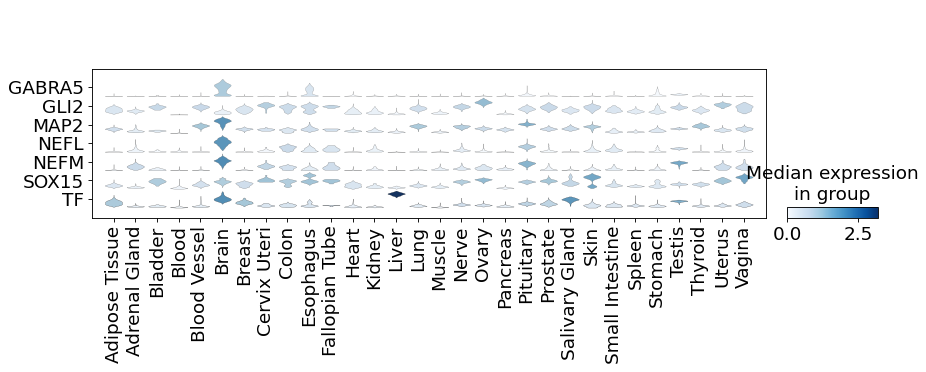

In [32]:
sc.pl.stacked_violin(adata, ['GABRA5', 'GLI2', 'MAP2', 
                      'NEFL', 'NEFM', 'SOX15', 'TF'],
             groupby='Tissue', swap_axes=True)

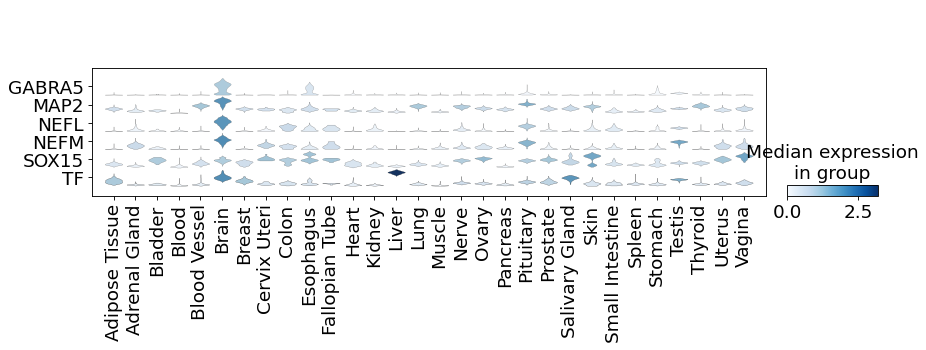

In [33]:
sc.pl.stacked_violin(adata, ['GABRA5', 'MAP2', 
                      'NEFL', 'NEFM', 'SOX15', 'TF'],
             groupby='Tissue', swap_axes=True, save='gtex')